In [1]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns',None)
pd.options.mode.chained_assignment = None

# Identify Bankrupt Companies From CRSP #

In [2]:
CRSP = pd.read_csv('CRSP_1985-2019.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,6,9,18,19,49,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
CRSP.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,TSYMBOL,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PERMCO,ISSUNO,HEXCD,HSICCD,CUSIP,DCLRDT,DLAMT,DLPDT,DLSTCD,NEXTDT,PAYDT,RCRDDT,SHRFLG,HSICMG,HSICIG,DISTCD,DIVAMT,FACPR,FACSHR,ACPERM,ACCOMP,SHRENDDT,NWPERM,DLRETX,DLPRC,DLRET,TRTSCD,NMSIND,MMCNT,NSDINX,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,CFACPR,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000,19851231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5625,NaN,19860107.0,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000,19860131,19861203.0,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860429.0,NaN,NaN,NaN,NaN,1.0,1.0,13.0,2.0,-2.50,-4.4375,-4.3750,1771.0,C,NaN,NaN,3680.0,1.0,1.0,-4.3750,0.250,19860131.0,C,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000,19860228,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.25,-4.3750,-3.2500,828.0,-0.257143,NaN,NaN,3680.0,1.0,1.0,-3.2500,0.250,19860228.0,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000,19860331,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-3.25,-4.4375,-4.4375,1078.0,0.365385,NaN,NaN,3680.0,1.0,1.0,-4.4375,0.125,19860331.0,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000,19860430,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860730.0,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-4.00,-4.3125,-4.0000,957.0,-0.098592,NaN,NaN,3793.0,1.0,1.0,-4.0000,0.250,19860430.0,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148


In [4]:
CRSP_u = CRSP[['PERMNO','date','DLSTCD']]
CRSP_u['bankrupt'] = [1 if x == 574 else 0 for x in CRSP_u['DLSTCD']]
CRSP_u.drop_duplicates(inplace = True)#columns differ in CRSP, but we don't care about those columns 
len(CRSP_u)

3133876

In [5]:
all_permno = len(CRSP_u['PERMNO'].unique())
all_bankrupt = len(CRSP_u[CRSP_u['bankrupt'] == 1])
print('Number of Bankrupt Companies:', all_bankrupt,
      '\nNumber of Companies:', all_permno,
      '\nPercentage of Bankrupt Companies:', all_bankrupt/all_permno)

Number of Bankrupt Companies: 729 
Number of Companies: 28357 
Percentage of Bankrupt Companies: 0.025707938075254788


In [6]:
bankrupt = CRSP_u[CRSP_u['bankrupt'] == 1]
bankrupt['date'] = bankrupt['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))
bankrupt['year'] = bankrupt['date'].apply(lambda x: x.year)
bankrupt['quarter'] = bankrupt['date'].apply(lambda x: x.quarter)
bankrupt.set_index('PERMNO', inplace = True)
bankrupt

,date,DLSTCD,bankrupt,year,quarter
PERMNO,,,,,
10125,1991-08-30,574.0,1,1991,3
10174,1993-02-26,574.0,1,1993,1
10175,1997-07-31,574.0,1,1997,3
10285,1992-01-31,574.0,1,1992,1
10304,2010-04-30,574.0,1,2010,2
...,...,...,...,...,...
93317,2014-03-31,574.0,1,2014,1
93348,2011-01-31,574.0,1,2011,1
93355,2013-12-31,574.0,1,2013,4


In [7]:
CRSP_t1 = pd.DataFrame(index = CRSP_u['PERMNO'].unique())
CRSP_t1['bankrupt'] = bankrupt['bankrupt']
CRSP_t1['bankrupt'].fillna(0, inplace = True)
CRSP_t1['year'] = bankrupt['year']
CRSP_t1['quarter'] = bankrupt['quarter']
CRSP_t1.index.names = ['PERMNO']
CRSP_t1.reset_index(inplace = True)
CRSP_t1

,PERMNO,bankrupt,year,quarter
0,10000,0.0,NaN,NaN
1,10001,0.0,NaN,NaN
2,10002,0.0,NaN,NaN
3,10003,0.0,NaN,NaN
4,10005,0.0,NaN,NaN
...,...,...,...,...
28352,93432,0.0,NaN,NaN
28353,93433,0.0,NaN,NaN
28354,93434,0.0,NaN,NaN
28355,93435,0.0,NaN,NaN


In [8]:
if len(CRSP_t1['PERMNO'].unique()) != all_permno:
    raise TypeError('Check Cleaning')
print(len(CRSP_t1['PERMNO'].unique()),len(CRSP_t1))
if len(CRSP_t1['PERMNO'].unique()) != len(CRSP_t1):
    raise TypeError('Check Index')

28357 28357


In [9]:
# Old Way

# CRSP_t1 = CRSP_u.groupby(['PERMNO','bankrupt', 'DLSTCD'])['date'].max().to_frame().reset_index()
# CRSP_t1['date'] = CRSP_t1['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))
# CRSP_t1['year'] = CRSP_t1['date'].apply(lambda x: x.year)
# CRSP_t1['quarter'] = CRSP_t1['date'].apply(lambda x: x.quarter)
# CRSP_t1.drop(columns = 'date', inplace = True)
# company_status = CRSP_t1
# company_status.head()
# company_status.to_csv('company_status.csv')
# bankrupt = CRSP_t1[CRSP_t1['Bankrupt'] == 1]

# Clean CCM #

In [10]:
CCM = pd.read_csv('CCM_Annual_1985-2019.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,17,33,37,952,953,955,956,957,962,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
CCM.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchg,acctstd,acqmeth,adrr,ajex,ajp,bspr,compst,curcd,curncd,currtr,curuscn,final,fyr,ismod,ltcm,ogm,pddur,scf,src,stalt,udpl,upd,apdedate,fdate,pdate,acchg,acco,accrt,acdo,aco,acodo,acominc,acox,acoxar,acqao,acqcshi,acqgdwl,acqic,acqintan,acqinvt,acqlntal,acqniintc,acqppe,acqsc,act,adpac,aedi,afudcc,afudci,aldo,am,amc,amdc,amgw,ano,ao,aocidergl,aociother,aocipen,aocisecgl,aodo,aol2,aoloch,aox,ap,apalch,apb,apc,apofs,aqa,aqc,aqd,aqeps,aqi,aqp,aqpl1,aqs,arb,arc,arce,arced,arceeps,artfs,at,aul3,autxr,balr,banlr,bast,bastr,batr,bcef,bclr,bcltbl,bcnlr,bcrbl,bct,bctbl,bctr,billexce,bkvlps,bltbl,ca,capr1,capr2,capr3,caps,capsft,capx,capxv,cb,cbi,cdpac,cdvc,ceiexbill,ceq,ceql,ceqt,cfbd,cfere,cfo,cfpdo,cga,cgri,cgti,cgui,ch,che,chech,chs,ci,cibegni,cicurr,cidergl,cimii,ciother,cipen,cisecgl,citotal,cld2,cld3,cld4,cld5,clfc,clfx,clg,clis,cll,cllc,clo,clrll,clt,cmp,cnltbl,cogs,cpcbl,cpdoi,cpnli,cppbl,cprei,crv,crvnli,cshfd,cshi,csho,cshpri,cshr,cshrc,cshrp,cshrso,cshrt,cshrw,cstk,cstkcv,cstke,dbi,dc,dclo,dcom,dcpstk,dcs,dcvsr,dcvsub,dcvt,dd,dd1,dd2,dd3,dd4,dd5,depc,derac,deralt,derhedgl,derlc,derllt,dfpac,dfs,dfxa,diladj,dilavx,dlc,dlcch,dltis,dlto,dltp,dltr,dltsub,dltt,dm,dn,do,donr,dp,dpacb,dpacc,dpacli,dpacls,dpacme,dpacnr,dpaco,dpacre,dpact,dpc,dpdc,dpltb,dpret,dpsc,dpstb,dptb,dptc,dptic,dpvieb,dpvio,dpvir,drc,drci,drlt,ds,dt,dtea,dted,dteeps,dtep,dudd,dv,dvc,dvdnp,dvintf,dvp,dvpa,dvpd,dvpdp,dvpibb,dvrpiv,dvrre,dvsco,dvt,dxd2,dxd3,dxd4,dxd5,ea,ebit,ebitda,eiea,emol,emp,epsfi,epsfx,epspi,epspx,esopct,esopdlt,esopnr,esopr,esopt,esub,esubc,excadj,exre,fatb,fatc,fatd,fate,fatl,fatn,fato,fatp,fca,fdfr,fea,fel,ffo,ffs,fiao,finaco,finao,fincf,finch,findlc,findlt,finivst,finlco,finlto,finnp,finrecc,finreclt,finrev,finxint,finxopr,fopo,fopox,fopt,fsrco,fsrct,fuseo,fuset,gbbl,gdwl,gdwlam,gdwlia,gdwlid,gdwlieps,gdwlip,geqrv,gla,glcea,glced,glceeps,glcep,gld,gleps,gliv,glp,govgr,govtown,gp,gphbl,gplbl,gpobl,gprbl,gptbl,gwo,hedgegl,iaeq,iaeqci,iaeqmi,iafici,iafxi,iafxmi,iali,ialoi,ialti,iamli,iaoi,iapli,iarei,iasci,iasmi,iassi,iasti,iatci,iati,iatmi,iaui,ib,ibadj,ibbl,ibc,ibcom,ibki,ibmii,icapt,idiis,idilb,idilc,idis,idist,idit,idits,iire,initb,intan,intano,intc,intpn,invch,invfg,invo,invofs,invreh,invrei,invres,invrm,invt,invwip,iobd,ioi,iore,ip,ipabl,ipc,iphbl,iplbl,ipobl,iptbl,ipti,ipv,irei,irent,irii,irli,irnli,irsi,iseq,iseqc,iseqm,isfi,isfxc,isfxm,isgr,isgt,isgu,islg,islgc,islgm,islt,isng,isngc,isngm,isotc,isoth,isotm,issc,issm,issu,ist,istc,istm,isut,itcb,itcc,itci,ivaco,ivaeq,ivao,ivch,ivgod,ivi,ivncf,ivpt,ivst,ivstch,lcabg,lcacl,lcacr,lcag,lcal,lcalt,lcam,lcao,lcast,lcat,lco,lcox,lcoxar,lcoxdr,lct,lcuacu,li,lif,lifr,lifrp,lloml,lloo,llot,llrci,llrcr,llwoci,llwocr,lno,lo,lol2,loxdr,lqpl1,lrv,ls,lse,lst,lt,lul3,mib,mibn,mibt,mii,mrc1,mrc2,mrc3,mrc4,mrc5,mrct,mrcta,msa,msvrv,mtl,nat,nco,nfsr,ni,niadj,nieci,niint,niintpfc,niintpfp,niit,nim,nio,nipfc,nipfp,nit,nits,nopi,nopio,np,npanl,npaore,nparl,npat,nrtxt,nrtxtd,nrtxteps,oancf,ob,oiadp,oibdp,opeps,opili,opincar,opini,opioi,opiri,opiti,oprepsx,optca,optdr,optex,optexd,optfvgr,optgr,optlife,optosby,optosey,optprcby,optprcca,optprcex,optprcey,optprcgr,optprcwa,optrfr,optvol,palr,panlr,patr,pcl,pclr,pcnlr,pctr,pdvc,pi,pidom,pifo,pll,pltbl,pnca,pncad,pncaeps,pncia,pncid,pncieps,pncip,pncwia,pncwid,pncwieps,pncwip,pnlbl,pnli,pnrsho,pobl,ppcbl,ppegt,ppenb,ppenc,ppenli,ppenls,ppenme,ppennr,ppeno,ppent,ppevbb,ppeveb,ppevo,ppevr,pppabl,ppphbl,pppobl,ppptbl,prc,prca,prcad,prcaeps,prebl,pri,prodv,prsho,prstkc,prstkcc,prstkpc,prvt,pstk,pstkc,pstkl,pstkn,pstkr,pstkrv,ptbl,ptran,pvcl,pvo,pvon,pvpl,pvt,pwoi,radp,ragr,rari,rati,rca,rcd,rceps,rcl,rcp,rdip,rdipa,rdipd,rdipeps,rdp,re,rea,reajo,recch,recco,recd,rect,recta,rectr,recub,ret,reuna,reunr,revt,ris,rll,rlo,rlp,rlri,rlt,rmum,rpag,rra,rrd,rreps,rrp,rstche,rstchelt,rvbci,rvbpi,rvbti,rvdo,rvdt,rveqt,rvlrv,rvno,rvnt,rvri,rvsi,rvti,r

In [12]:
CCM_eff = CCM[CCM['LPERMNO'].notnull()]
print(len(CCM), len(CCM_eff))
if len(CCM) != len(CCM_eff):
    raise TypeError('Check LPERMNO')

226569 226569


In [13]:
matched = np.intersect1d(CCM['LPERMNO'].unique(),CRSP['PERMNO'].unique())
print(len(CCM['LPERMNO'].unique()),len(CRSP['PERMNO'].unique()),len(matched))

22884 28357 22875


In [14]:
#for quarterly: CCM_t1 = CCM[['tic','conm','LPERMNO','fyearq','wcapq','atq','req','ebitq','mkvaltq','dlcq','saleq']]

In [15]:
CCM_t1 = CCM[['tic','conm','LPERMNO','fyear','wcap','at','re','ebit','mkvalt','dt','sale']]
CCM_t1

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale
0,AMFD.,A & M FOOD SERVICES INC,10015,1985.0,-10.070,39.495,5.385,5.238,NaN,NaN,53.798
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,9.815,13.990,3.003,0.658,NaN,NaN,24.189
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,9.712,14.586,3.796,1.933,NaN,NaN,36.308
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,11.278,16.042,3.981,-0.405,NaN,NaN,37.356
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-1.714,16.280,-3.857,-4.372,NaN,NaN,32.808
...,...,...,...,...,...,...,...,...,...,...,...
226564,NVT,NVENT ELECTRIC PLC,17676,2018.0,384.800,4552.700,-24.400,363.500,3980.4510,941.700,2213.600
226565,NVT,NVENT ELECTRIC PLC,17676,2019.0,336.500,4640.300,NaN,359.700,4326.8570,1064.600,2204.000
226566,GRIN,GRINDROD SHIPPING,17884,2018.0,66.283,447.627,-11.190,-16.924,118.9594,114.456,319.018
226567,NMCI,NAVIOS MARITIME CONTAINERS,18313,2018.0,-22.247,413.527,NaN,28.692,97.9265,218.961,133.921


## Different Companies with the Same PERMNO ##

In [16]:
len(CCM_t1['LPERMNO'].unique()), len(CCM_t1['conm'].unique()), len(CCM_t1['tic'].unique())

(22884, 22263, 22266)

In [17]:
check = CCM_t1[['LPERMNO','conm']].drop_duplicates()

In [18]:
mul = check[check['LPERMNO'].duplicated()]['LPERMNO']
len(mul)

348

In [19]:
mul

6637      16505
17707     87119
25229     66157
58241     55212
59486     64995
          ...  
225628    90098
225867    90183
226166    27204
226276    82678
226493    85077
Name: LPERMNO, Length: 348, dtype: int64

### only cares abou those go bankrupt ###

In [20]:
mul_b = set(mul) & set(bankrupt.index)
len(mul_b)

7

In [21]:
mul_b

{12933, 13378, 82831, 89831, 90826, 90968, 93106}

In [22]:
#we have data until two years before the company goes bankrupt 

In [23]:
CCM_t1[CCM_t1['LPERMNO'] == 12933]

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale
39974,MEI.2,MEI CORP,12933,1985.0,124.400,501.586,212.826,82.643,NaN,NaN,808.273
84348,MEII10,MEI DIVERSIFIED INC,12933,1986.0,193.739,297.527,22.953,3.653,NaN,NaN,216.122
84349,MEII10,MEI DIVERSIFIED INC,12933,1987.0,158.969,323.577,9.020,0.934,NaN,NaN,242.077
84350,MEII10,MEI DIVERSIFIED INC,12933,1988.0,155.457,255.356,17.000,0.037,NaN,NaN,219.997
84351,MEII10,MEI DIVERSIFIED INC,12933,1989.0,129.801,246.212,12.524,-4.779,NaN,NaN,205.428
84352,MEII10,MEI DIVERSIFIED INC,12933,1990.0,41.739,274.586,1.332,-4.488,NaN,NaN,288.189
84353,MEII10,MEI DIVERSIFIED INC,12933,1991.0,25.640,245.319,-8.994,-0.646,NaN,NaN,448.015


In [24]:
bankrupt.loc[12933]

date        1993-02-26 00:00:00
DLSTCD                      574
bankrupt                      1
year                       1993
quarter                       1
Name: 12933, dtype: object

In [25]:
CCM_t1[CCM_t1['LPERMNO'] == 13378]

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale
113112,EVRYQ,EVERYWARE GLOBAL INC,13378,2013.0,107.128,340.166,-62.034,20.575,170.0712,265.456,439.809
113113,EVRYQ,EVERYWARE GLOBAL INC,13378,2014.0,-201.676,234.124,-194.271,-30.241,15.0249,287.336,353.981
213766,ROIQ.1,ROI ACQUISITION CORP,13378,2012.0,0.152,75.711,0.000,-0.437,29.6108,0.000,0.000


In [26]:
bankrupt.loc[13378]

date        2015-04-30 00:00:00
DLSTCD                      574
bankrupt                      1
year                       2015
quarter                       2
Name: 13378, dtype: object

In [27]:
CCM_t1[CCM_t1['LPERMNO'] == 82831]

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale
168171,NEOL.1,NEOPHARM INC-OLD,82831,1996.0,4.013,4.492,-1.866,-2.056,NaN,NaN,0.000
168172,NEOL.1,NEOPHARM INC-OLD,82831,1997.0,2.349,2.854,-3.887,-2.232,NaN,NaN,0.550
168173,NEOL.1,NEOPHARM INC-OLD,82831,1998.0,1.077,1.782,-5.461,-3.303,101.1468,NaN,0.000
168174,NEOL.1,NEOPHARM INC-OLD,82831,1999.0,23.938,25.052,-1.707,4.793,237.8128,0.000,11.000
168175,NEOL.1,NEOPHARM INC-OLD,82831,2000.0,139.841,140.532,-2.093,-3.832,555.1339,0.000,3.000
168176,NEOL.1,NEOPHARM INC-OLD,82831,2001.0,120.306,129.195,-42.408,-19.229,406.7619,0.000,0.000
168177,NEOL.1,NEOPHARM INC-OLD,82831,2002.0,87.665,95.937,-78.900,-38.835,165.8093,0.000,0.000
168178,NEOL.1,NEOPHARM INC-OLD,82831,2003.0,36.256,46.081,-131.691,-53.606,343.6839,0.000,0.000
168179,NEOL.1,NEOPHARM INC-OLD,82831,2004.0,55.336,67.434,-189.300,-55.480,292.3962,0.000,0.157
168180,NEOL.1,NEOPHARM INC-OLD,82831,2005.0,21.608,33.370,-228.025,-42.732,256.1546,0.000,0.543


In [28]:
bankrupt.loc[82831]

date        2019-06-28 00:00:00
DLSTCD                      574
bankrupt                      1
year                       2019
quarter                       2
Name: 82831, dtype: object

# Merge CRSP and CCM #

In [29]:
matched2 = np.intersect1d(CCM_t1['LPERMNO'].unique(),CRSP_t1['PERMNO'].unique())
print(len(CCM_t1['LPERMNO'].unique()),len(CRSP_t1['PERMNO'].unique()),len(matched2))
if len(matched) != len(matched2):
    raise TypeError('Check Cleaning')

22884 28357 22875


### since some companies go bankrupt in year t and we only have data until t-2, and some companies go bankrupt in year t and we have data in t (also there are other cases), so I currently lable all fiscal years for bankrupt companies years as 1 and leave the bankrupt year. I suggest just using this join to findout intersection for these two datasets, and relable bankrupt after lagging the columns & further data cleaning ###

In [30]:
cm = pd.merge(CCM_t1, CRSP_t1, how = 'inner', left_on = ['LPERMNO'], right_on = ['PERMNO'])
cm

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
0,AMFD.,A & M FOOD SERVICES INC,10015,1985.0,-10.070,39.495,5.385,5.238,NaN,NaN,53.798,10015,0.0,NaN,NaN
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,9.815,13.990,3.003,0.658,NaN,NaN,24.189,10031,0.0,NaN,NaN
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,9.712,14.586,3.796,1.933,NaN,NaN,36.308,10031,0.0,NaN,NaN
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,11.278,16.042,3.981,-0.405,NaN,NaN,37.356,10031,0.0,NaN,NaN
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-1.714,16.280,-3.857,-4.372,NaN,NaN,32.808,10031,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,NVT,NVENT ELECTRIC PLC,17676,2018.0,384.800,4552.700,-24.400,363.500,3980.4510,941.700,2213.600,17676,0.0,NaN,NaN
226479,NVT,NVENT ELECTRIC PLC,17676,2019.0,336.500,4640.300,NaN,359.700,4326.8570,1064.600,2204.000,17676,0.0,NaN,NaN
226480,GRIN,GRINDROD SHIPPING,17884,2018.0,66.283,447.627,-11.190,-16.924,118.9594,114.456,319.018,17884,0.0,NaN,NaN
226481,NMCI,NAVIOS MARITIME CONTAINERS,18313,2018.0,-22.247,413.527,NaN,28.692,97.9265,218.961,133.921,18313,0.0,NaN,NaN


In [31]:
if len(cm['LPERMNO'].unique()) != len(matched):
    raise TypeError('Check')

In [32]:
print('Ramining Number of Bankrupt:', len(cm[cm['bankrupt'] == 1]['LPERMNO'].unique()))

Ramining Number of Bankrupt: 689


In [33]:
#missing bankrupt companies
len(set(bankrupt.index) - set(cm[cm['bankrupt'] == 1]['LPERMNO'].unique()))

40

In [34]:
#company bankrupty in the year with data 
cm[cm['LPERMNO'] == 66405]

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
99,4327B,ADI ELECTRONICS INC,66405,1985.0,4.211,13.700,1.612,0.233,NaN,NaN,9.721,66405,1.0,1986.0,4.0
100,4327B,ADI ELECTRONICS INC,66405,1986.0,-6.780,12.117,-4.368,-4.322,NaN,NaN,6.600,66405,1.0,1986.0,4.0


In [35]:
#cm.to_csv('/Users/su/Documents/Columbia/2nd Semester/IEOR4524/project/bankruptcy_prediction/Merged_1985-2019.csv')

# Lag one year ahead #

In [36]:
# check whether the fyear is ascending for the same LPERMNO of the different conms which are bankrupted：no! 
t1 = cm[cm["LPERMNO"] == 13378]
t1

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
113789,EVRYQ,EVERYWARE GLOBAL INC,13378,2013.0,107.128,340.166,-62.034,20.575,170.0712,265.456,439.809,13378,1.0,2015.0,2.0
113790,EVRYQ,EVERYWARE GLOBAL INC,13378,2014.0,-201.676,234.124,-194.271,-30.241,15.0249,287.336,353.981,13378,1.0,2015.0,2.0
113791,ROIQ.1,ROI ACQUISITION CORP,13378,2012.0,0.152,75.711,0.000,-0.437,29.6108,0.000,0.000,13378,1.0,2015.0,2.0


In [37]:
# check whether the fyear is ascending for the same LPERMNO of the different conms which are not bankrupt：no！
t2 = cm[cm["LPERMNO"] == 87119]
t2

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
4254,CRAN,CROWN ANDERSEN INC,87119,1986.0,3.923,10.318,3.366,0.652,NaN,NaN,11.935,87119,0.0,NaN,NaN
4255,CRAN,CROWN ANDERSEN INC,87119,1987.0,3.889,14.745,3.355,0.082,NaN,NaN,11.844,87119,0.0,NaN,NaN
4256,CRAN,CROWN ANDERSEN INC,87119,1988.0,2.199,18.865,2.427,-1.137,NaN,NaN,27.446,87119,0.0,NaN,NaN
4257,CRAN,CROWN ANDERSEN INC,87119,1989.0,1.079,13.496,1.437,2.200,NaN,NaN,18.466,87119,0.0,NaN,NaN
4258,CRAN,CROWN ANDERSEN INC,87119,1990.0,2.887,13.326,3.138,2.232,NaN,NaN,17.752,87119,0.0,NaN,NaN
4259,CRAN,CROWN ANDERSEN INC,87119,1991.0,3.584,17.682,4.677,2.893,NaN,NaN,22.605,87119,0.0,NaN,NaN
4260,CRAN,CROWN ANDERSEN INC,87119,1992.0,5.948,19.334,6.581,2.736,NaN,NaN,25.034,87119,0.0,NaN,NaN
4261,CRAN,CROWN ANDERSEN INC,87119,1993.0,5.485,17.716,6.785,0.887,NaN,NaN,20.393,87119,0.0,NaN,NaN
4262,CRAN,CROWN ANDERSEN INC,87119,1994.0,7.594,19.290,8.350,-0.358,NaN,NaN,13.831,87119,0.0,NaN,NaN
4263,CRAN,CROWN ANDERSEN INC,87119,1995.0,9.098,20.985,9.828,1.912,NaN,NaN,21.634,87119,0.0,NaN,NaN


In [38]:
# check whether the fyear is ascending for the same LPERMNO of the same conm：yes！
t3 = cm[cm["LPERMNO"] == 10031]
t3

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,9.815,13.990,3.003,0.658,NaN,NaN,24.189,10031,0.0,NaN,NaN
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,9.712,14.586,3.796,1.933,NaN,NaN,36.308,10031,0.0,NaN,NaN
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,11.278,16.042,3.981,-0.405,NaN,NaN,37.356,10031,0.0,NaN,NaN
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-1.714,16.280,-3.857,-4.372,NaN,NaN,32.808,10031,0.0,NaN,NaN


In [39]:
cmtest = cm

In [40]:
# change the fyear to ascend within every LPERMNO
cm_asc = cmtest.groupby(['LPERMNO']).apply(lambda x: x.sort_values('fyear',ascending =True))

In [41]:
cm_asc

tic                          conm  LPERMNO   fyear  \
LPERMNO                                                                
10000   84198   OMFGA  OPTIMUM MANUFACTURING  -CL A    10000  1986.0   
10001   84122    EGAS               GAS NATURAL INC    10001  1986.0   
        84123    EGAS               GAS NATURAL INC    10001  1987.0   
        84124    EGAS               GAS NATURAL INC    10001  1988.0   
        84125    EGAS               GAS NATURAL INC    10001  1989.0   
...               ...                           ...      ...     ...   
93436   221452   TSLA                     TESLA INC    93436  2015.0   
        221453   TSLA                     TESLA INC    93436  2016.0   
        221454   TSLA                     TESLA INC    93436  2017.0   
        221455   TSLA                     TESLA INC    93436  2018.0   
        221456   TSLA                     TESLA INC    93436  2019.0   

                    wcap         at        re      ebit      mkvalt  \
LPERMNO                                                               
10000   84198     -0.009      2.115    -1.599    -0.686         NaN   
10001   84122      0.100     12.242     4.439     1.476         NaN   
        84123     -0.113     11.771     4.335     0.624         NaN   
        84124      0.093     11.735     4.472     0.984         NaN   
        84125      0.852     18.565     5.221     2.401         NaN   
...                  ...        ...       ...       ...         ...   
93436   221452   -24.706   8092.460 -2325.879  -716.629  31543.3143   
        221453   432.791  22664.076 -3020.977  -645.640  34523.9701   
        221454 -1104.150  28655.372 -4940.951 -1565.086  52554.9460   
        221455 -1685.828  29739.614 -5326.050  -252.840  57442.2784   
        221456  1436.000  34309.000 -6119.000    80.000  75717.7300   

                       dt       sale  PERMNO  bankrupt  year  quarter  
LPERMNO                                                                
10000   84198         NaN      1.026   10000       0.0   NaN      NaN  
10001   84122         NaN     21.460   10001       0.0   NaN      NaN  
        84123         NaN     16.621   10001       0.0   NaN      NaN  
        84124         NaN     16.978   10001       0.0   NaN      NaN  
        84125         NaN     22.910   10001       0.0   NaN      NaN  
...                   ...        ...     ...       ...   ...      ...  
93436   221452   2673.541   4046.025   93436       0.0   NaN      NaN  
        221453   7256.038   7000.132   93436       0.0   NaN      NaN  
        221454  10450.110  11758.751   93436       0.0   NaN      NaN  
        221455  12083.515  21461.268   93436       0.0   NaN      NaN  
        221456  14697.000  24578.000   93436       0.0   NaN      NaN  

[226483 rows x 15 columns]

In [42]:
# reset the index to get the df like before but with ascending fyear
cm = cm_asc.set_index('LPERMNO').reset_index()

In [43]:
cm

,LPERMNO,tic,conm,fyear,wcap,at,re,ebit,mkvalt,dt,sale,PERMNO,bankrupt,year,quarter
0,10000,OMFGA,OPTIMUM MANUFACTURING -CL A,1986.0,-0.009,2.115,-1.599,-0.686,NaN,NaN,1.026,10000,0.0,NaN,NaN
1,10001,EGAS,GAS NATURAL INC,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460,10001,0.0,NaN,NaN
2,10001,EGAS,GAS NATURAL INC,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,10001,0.0,NaN,NaN
3,10001,EGAS,GAS NATURAL INC,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,10001,0.0,NaN,NaN
4,10001,EGAS,GAS NATURAL INC,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,10001,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,93436,TSLA,TESLA INC,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,93436,0.0,NaN,NaN
226479,93436,TSLA,TESLA INC,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,93436,0.0,NaN,NaN
226480,93436,TSLA,TESLA INC,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,93436,0.0,NaN,NaN
226481,93436,TSLA,TESLA INC,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,93436,0.0,NaN,NaN


In [44]:
# lag one period
cm_shift = cm[['tic','conm','LPERMNO','fyear','wcap','at','re','ebit','mkvalt','dt','sale']]

In [45]:
cm_shift

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.009,2.115,-1.599,-0.686,NaN,NaN,1.026
1,EGAS,GAS NATURAL INC,10001,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460
2,EGAS,GAS NATURAL INC,10001,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621
3,EGAS,GAS NATURAL INC,10001,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978
4,EGAS,GAS NATURAL INC,10001,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910
...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025
226479,TSLA,TESLA INC,93436,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132
226480,TSLA,TESLA INC,93436,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751
226481,TSLA,TESLA INC,93436,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268


In [46]:
cm_shift['fyear_lagged_1'] = cm_shift['fyear'].shift(-1)
cm_shift['wcap_lagged_1'] = cm_shift['wcap'].shift(-1)
cm_shift['at_lagged_1'] = cm_shift['at'].shift(-1)
cm_shift['re_lagged_1'] = cm_shift['re'].shift(-1)
cm_shift['ebit_lagged_1'] = cm_shift['ebit'].shift(-1)
cm_shift['mkvalt_lagged_1'] = cm_shift['mkvalt'].shift(-1)
cm_shift['dt_lagged_1'] = cm_shift['dt'].shift(-1)
cm_shift['sale_lagged_1'] = cm_shift['sale'].shift(-1)


In [47]:
cm_shift

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,fyear_lagged_1,wcap_lagged_1,at_lagged_1,re_lagged_1,ebit_lagged_1,mkvalt_lagged_1,dt_lagged_1,sale_lagged_1
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.009,2.115,-1.599,-0.686,NaN,NaN,1.026,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460
1,EGAS,GAS NATURAL INC,10001,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621
2,EGAS,GAS NATURAL INC,10001,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978
3,EGAS,GAS NATURAL INC,10001,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910
4,EGAS,GAS NATURAL INC,10001,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,1990.0,1.293,18.881,5.829,2.459,NaN,NaN,23.227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132
226479,TSLA,TESLA INC,93436,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751
226480,TSLA,TESLA INC,93436,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268
226481,TSLA,TESLA INC,93436,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,2019.0,1436.000,34309.000,-6119.000,80.000,75717.7300,14697.000,24578.000


In [48]:
# add the column of bankrupt, year, column
cm_shift['bankrupt'] = cm['bankrupt']
cm_shift['year'] = cm['year']
cm_shift['quarter'] = cm['quarter']

In [49]:
# bankrupt companies keep the same
len(cm_shift[cm_shift['bankrupt']==1]['LPERMNO'].unique()) 

689

In [50]:
cm_shift

,tic,conm,LPERMNO,fyear,wcap,at,re,ebit,mkvalt,dt,sale,fyear_lagged_1,wcap_lagged_1,at_lagged_1,re_lagged_1,ebit_lagged_1,mkvalt_lagged_1,dt_lagged_1,sale_lagged_1,bankrupt,year,quarter
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.009,2.115,-1.599,-0.686,NaN,NaN,1.026,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460,0.0,NaN,NaN
1,EGAS,GAS NATURAL INC,10001,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,0.0,NaN,NaN
2,EGAS,GAS NATURAL INC,10001,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,0.0,NaN,NaN
3,EGAS,GAS NATURAL INC,10001,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,0.0,NaN,NaN
4,EGAS,GAS NATURAL INC,10001,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,1990.0,1.293,18.881,5.829,2.459,NaN,NaN,23.227,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,0.0,NaN,NaN
226479,TSLA,TESLA INC,93436,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,0.0,NaN,NaN
226480,TSLA,TESLA INC,93436,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,0.0,NaN,NaN
226481,TSLA,TESLA INC,93436,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,2019.0,1436.000,34309.000,-6119.000,80.000,75717.7300,14697.000,24578.000,0.0,NaN,NaN


In [51]:
# drop the last row of each LPERMNO after lagging one year
grouped = cm_shift.groupby(['LPERMNO'])
cm_new = grouped.apply(lambda x: x.drop(x.index[-1]))

In [52]:
cm_new

tic             conm  LPERMNO   fyear      wcap         at  \
LPERMNO                                                                       
10001   1       EGAS  GAS NATURAL INC    10001  1986.0     0.100     12.242   
        2       EGAS  GAS NATURAL INC    10001  1987.0    -0.113     11.771   
        3       EGAS  GAS NATURAL INC    10001  1988.0     0.093     11.735   
        4       EGAS  GAS NATURAL INC    10001  1989.0     0.852     18.565   
        5       EGAS  GAS NATURAL INC    10001  1990.0     1.293     18.881   
...              ...              ...      ...     ...       ...        ...   
93436   226477  TSLA        TESLA INC    93436  2014.0  1091.491   5849.251   
        226478  TSLA        TESLA INC    93436  2015.0   -24.706   8092.460   
        226479  TSLA        TESLA INC    93436  2016.0   432.791  22664.076   
        226480  TSLA        TESLA INC    93436  2017.0 -1104.150  28655.372   
        226481  TSLA        TESLA INC    93436  2018.0 -1685.828  29739.614   

                      re      ebit      mkvalt         dt       sale  \
LPERMNO                                                                
10001   1          4.439     1.476         NaN        NaN     21.460   
        2          4.335     0.624         NaN        NaN     16.621   
        3          4.472     0.984         NaN        NaN     16.978   
        4          5.221     2.401         NaN        NaN     22.910   
        5          5.829     2.459         NaN        NaN     23.227   
...                  ...       ...         ...        ...        ...   
93436   226477 -1433.682  -186.689  27954.2681   2429.883   3198.356   
        226478 -2325.879  -716.629  31543.3143   2673.541   4046.025   
        226479 -3020.977  -645.640  34523.9701   7256.038   7000.132   
        226480 -4940.951 -1565.086  52554.9460  10450.110  11758.751   
        226481 -5326.050  -252.840  57442.2784  12083.515  21461.268   

                fyear_lagged_1  wcap_lagged_1  at_lagged_1  re_lagged_1  \
LPERMNO                                                                   
10001   1               1987.0         -0.113       11.771        4.335   
        2               1988.0          0.093       11.735        4.472   
        3               1989.0          0.852       18.565        5.221   
        4               1990.0          1.293       18.881        5.829   
        5               1991.0          1.654       19.599        6.309   
...                        ...            ...          ...          ...   
93436   226477          2015.0        -24.706     8092.460    -2325.879   
        226478          2016.0        432.791    22664.076    -3020.977   
        226479          2017.0      -1104.150    28655.372    -4940.951   
        226480          2018.0      -1685.828    29739.614    -5326.050   
        226481          2019.0       1436.000    34309.000    -6119.000   

                ebit_lagged_1  mkvalt_lagged_1  dt_lagged_1  sale_lagged_1  \
LPERMNO                                                                      
10001   1               0.624              NaN          NaN         16.621   
        2               0.984              NaN          NaN         16.978   
        3               2.401              NaN          NaN         22.910   
        4               2.459              NaN          NaN         23.227   
        5               2.414              NaN          NaN         23.850   
...                       ...              ...          ...            ...   
93436   226477       -716.629       31543.3143     2673.541       4046.025   
        226478       -645.640       34523.9701     7256.038       7000.132   
        226479      -1565.086       52554.9460    10450.110      11758.751   
        226480       -252.840       57442.2784    12083.515      21461.268   
        226481         80.000       75717.7300    14697.000      24578.000   

                bankrupt  year  quarter  
LPERMNO            

In [53]:
cm = cm_new.set_index('LPERMNO').reset_index()

In [54]:
bankrupt_number = len(cm[cm['bankrupt'] == 1]['LPERMNO'].unique())
not_bankrupt_number = len(cm[cm['bankrupt'] == 0]['LPERMNO'].unique())
print(bankrupt_number, not_bankrupt_number)
# bankrupt companies decrease(689-645=44) after lagging

645 20358


In [55]:
cm

,LPERMNO,tic,conm,fyear,wcap,at,re,ebit,mkvalt,dt,sale,fyear_lagged_1,wcap_lagged_1,at_lagged_1,re_lagged_1,ebit_lagged_1,mkvalt_lagged_1,dt_lagged_1,sale_lagged_1,bankrupt,year,quarter
0,10001,EGAS,GAS NATURAL INC,1986.0,0.100,12.242,4.439,1.476,NaN,NaN,21.460,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,0.0,NaN,NaN
1,10001,EGAS,GAS NATURAL INC,1987.0,-0.113,11.771,4.335,0.624,NaN,NaN,16.621,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,0.0,NaN,NaN
2,10001,EGAS,GAS NATURAL INC,1988.0,0.093,11.735,4.472,0.984,NaN,NaN,16.978,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,0.0,NaN,NaN
3,10001,EGAS,GAS NATURAL INC,1989.0,0.852,18.565,5.221,2.401,NaN,NaN,22.910,1990.0,1.293,18.881,5.829,2.459,NaN,NaN,23.227,0.0,NaN,NaN
4,10001,EGAS,GAS NATURAL INC,1990.0,1.293,18.881,5.829,2.459,NaN,NaN,23.227,1991.0,1.654,19.599,6.309,2.414,NaN,NaN,23.850,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2014.0,1091.491,5849.251,-1433.682,-186.689,27954.2681,2429.883,3198.356,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,0.0,NaN,NaN
203604,93436,TSLA,TESLA INC,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,0.0,NaN,NaN
203605,93436,TSLA,TESLA INC,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,0.0,NaN,NaN
203606,93436,TSLA,TESLA INC,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,0.0,NaN,NaN


# Calculate financial ratios & Deal with NaN #

In [56]:
# number of missing values for each column
nan = dict()
for i in cm.columns:
    nan[i] = cm[i].isna().sum()
sorted(nan.items(),key = lambda x: x[1], reverse=True)

[('year', 198846),
 ('quarter', 198846),
 ('dt', 114654),
 ('dt_lagged_1', 108425),
 ('mkvalt', 107874),
 ('mkvalt_lagged_1', 100979),
 ('wcap_lagged_1', 54156),
 ('wcap', 53998),
 ('ebit', 23367),
 ('ebit_lagged_1', 22908),
 ('re', 21567),
 ('re_lagged_1', 21386),
 ('sale', 18829),
 ('sale_lagged_1', 18155),
 ('at', 18061),
 ('at_lagged_1', 17626),
 ('tic', 4),
 ('fyear_lagged_1', 2),
 ('LPERMNO', 0),
 ('conm', 0),
 ('fyear', 0),
 ('bankrupt', 0)]

In [57]:
# number of zero for each column
nan = dict()
for i in cm.columns:
    nan[i] = len(cm[cm[i]==0])
sorted(nan.items(),key = lambda x: x[1], reverse=True)

[('bankrupt', 198846),
 ('dt_lagged_1', 19481),
 ('dt', 18700),
 ('sale', 3302),
 ('sale_lagged_1', 3106),
 ('re', 314),
 ('re_lagged_1', 276),
 ('ebit_lagged_1', 94),
 ('ebit', 93),
 ('wcap', 33),
 ('wcap_lagged_1', 31),
 ('at_lagged_1', 22),
 ('at', 18),
 ('LPERMNO', 0),
 ('tic', 0),
 ('conm', 0),
 ('fyear', 0),
 ('mkvalt', 0),
 ('fyear_lagged_1', 0),
 ('mkvalt_lagged_1', 0),
 ('year', 0),
 ('quarter', 0)]

In [58]:
# Plan 1: Drop all the missing values. Change all the 0 value to a small number. Only 69181 rows left. 34% of the data.
cm1 = cm.dropna(subset= cm.columns[4:19])
for i in cm.columns[4:19]:
    cm1[i] = cm[i].replace(0,10**-5)
cm1

,LPERMNO,tic,conm,fyear,wcap,at,re,ebit,mkvalt,dt,sale,fyear_lagged_1,wcap_lagged_1,at_lagged_1,re_lagged_1,ebit_lagged_1,mkvalt_lagged_1,dt_lagged_1,sale_lagged_1,bankrupt,year,quarter
113,10012,DPAC,DPAC TECHNOLOGIES CORP,1998.0,3.291,10.279,-13.037,-2.402,34.6289,2.521,12.604,1999.0,4.865,14.124,-10.589,2.737,159.0328,1.935,27.460,0.0,NaN,NaN
114,10012,DPAC,DPAC TECHNOLOGIES CORP,1999.0,4.865,14.124,-10.589,2.737,159.0328,1.935,27.460,2000.0,5.618,21.763,-8.650,1.746,41.8720,1.244,35.823,0.0,NaN,NaN
115,10012,DPAC,DPAC TECHNOLOGIES CORP,2000.0,5.618,21.763,-8.650,1.746,41.8720,1.244,35.823,2001.0,8.866,21.341,-6.692,1.919,65.0566,0.894,30.505,0.0,NaN,NaN
116,10012,DPAC,DPAC TECHNOLOGIES CORP,2001.0,8.866,21.341,-6.692,1.919,65.0566,0.894,30.505,2002.0,10.300,25.753,-4.235,0.906,27.9140,0.385,34.489,0.0,NaN,NaN
117,10012,DPAC,DPAC TECHNOLOGIES CORP,2002.0,10.300,25.753,-4.235,0.906,27.9140,0.385,34.489,2003.0,4.277,13.088,-18.159,-5.308,28.6781,0.414,19.567,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2014.0,1091.491,5849.251,-1433.682,-186.689,27954.2681,2429.883,3198.356,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,0.0,NaN,NaN
203604,93436,TSLA,TESLA INC,2015.0,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,0.0,NaN,NaN
203605,93436,TSLA,TESLA INC,2016.0,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,0.0,NaN,NaN
203606,93436,TSLA,TESLA INC,2017.0,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,2018.0,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,0.0,NaN,NaN


In [59]:
# five financial ratios: 
# X1 = WCAP/AT; (liquidity)
# X2 = RE/AT; (solvency)
# X3 = EBIT/AT; (profitability)
# X4 = MKVALT/DT;(financial structure)
# X5 = SALES/AT; (turnover)

cm1['x1'] = cm1['wcap']/cm1['at']
cm1['x1_lagged_1'] = cm1['wcap_lagged_1']/cm1['at_lagged_1']

cm1['x2'] = cm1['re']/cm1['at']
cm1['x2_lagged_1'] = cm1['re_lagged_1']/cm1['at_lagged_1']

cm1['x3'] = cm1['ebit']/cm1['at']
cm1['x3_lagged_1'] = cm1['ebit_lagged_1']/cm1['at_lagged_1']

cm1['x4'] = cm1['mkvalt']/cm1['dt']
cm1['x4_lagged_1'] = cm1['mkvalt_lagged_1']/cm1['dt_lagged_1']

cm1['x5'] = cm1['sale']/cm1['at']
cm1['x5_lagged_1'] = cm1['sale_lagged_1']/cm1['at_lagged_1']

cm1.rename(columns={'fyear_lagged_1':'predict_year'}, inplace = True)

In [60]:
cm1['fyear'] = cm1['fyear'].astype(int).astype(str)
cm1['fyear'] = cm1['fyear'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)


In [61]:
cm1['predict_year'] = cm1['predict_year'].astype(int).astype(str)
cm1['predict_year'] = cm1['predict_year'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1

,LPERMNO,tic,conm,fyear,wcap,at,re,ebit,mkvalt,dt,sale,predict_year,wcap_lagged_1,at_lagged_1,re_lagged_1,ebit_lagged_1,mkvalt_lagged_1,dt_lagged_1,sale_lagged_1,bankrupt,year,quarter,x1,x1_lagged_1,x2,x2_lagged_1,x3,x3_lagged_1,x4,x4_lagged_1,x5,x5_lagged_1
113,10012,DPAC,DPAC TECHNOLOGIES CORP,1998,3.291,10.279,-13.037,-2.402,34.6289,2.521,12.604,1999,4.865,14.124,-10.589,2.737,159.0328,1.935,27.460,0.0,NaN,NaN,0.320167,0.344449,-1.268314,-0.749717,-0.233680,0.193784,13.736176,82.187494,1.226189,1.944208
114,10012,DPAC,DPAC TECHNOLOGIES CORP,1999,4.865,14.124,-10.589,2.737,159.0328,1.935,27.460,2000,5.618,21.763,-8.650,1.746,41.8720,1.244,35.823,0.0,NaN,NaN,0.344449,0.258145,-0.749717,-0.397464,0.193784,0.080228,82.187494,33.659164,1.944208,1.646051
115,10012,DPAC,DPAC TECHNOLOGIES CORP,2000,5.618,21.763,-8.650,1.746,41.8720,1.244,35.823,2001,8.866,21.341,-6.692,1.919,65.0566,0.894,30.505,0.0,NaN,NaN,0.258145,0.415444,-0.397464,-0.313575,0.080228,0.089921,33.659164,72.770246,1.646051,1.429408
116,10012,DPAC,DPAC TECHNOLOGIES CORP,2001,8.866,21.341,-6.692,1.919,65.0566,0.894,30.505,2002,10.300,25.753,-4.235,0.906,27.9140,0.385,34.489,0.0,NaN,NaN,0.415444,0.399953,-0.313575,-0.164447,0.089921,0.035180,72.770246,72.503896,1.429408,1.339223
117,10012,DPAC,DPAC TECHNOLOGIES CORP,2002,10.300,25.753,-4.235,0.906,27.9140,0.385,34.489,2003,4.277,13.088,-18.159,-5.308,28.6781,0.414,19.567,0.0,NaN,NaN,0.399953,0.326788,-0.164447,-1.387454,0.035180,-0.405562,72.503896,69.270773,1.339223,1.495034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2014,1091.491,5849.251,-1433.682,-186.689,27954.2681,2429.883,3198.356,2015,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,0.0,NaN,NaN,0.186604,-0.003053,-0.245105,-0.287413,-0.031917,-0.088555,11.504368,11.798328,0.546798,0.499975
203604,93436,TSLA,TESLA INC,2015,-24.706,8092.460,-2325.879,-716.629,31543.3143,2673.541,4046.025,2016,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,0.0,NaN,NaN,-0.003053,0.019096,-0.287413,-0.133294,-0.088555,-0.028487,11.798328,4.757964,0.499975,0.308865
203605,93436,TSLA,TESLA INC,2016,432.791,22664.076,-3020.977,-645.640,34523.9701,7256.038,7000.132,2017,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,0.0,NaN,NaN,0.019096,-0.038532,-0.133294,-0.172427,-0.028487,-0.054618,4.757964,5.029128,0.308865,0.410351
203606,93436,TSLA,TESLA INC,2017,-1104.150,28655.372,-4940.951,-1565.086,52554.9460,10450.110,11758.751,2018,-1685.828,29739.614,-5326.050,-252.840,57442.2784,12083.515,21461.268,0.0,NaN,NaN,-0.038532,-0.056686,-0.172427,-0.179089,-0.054618,-0.008502,5.029128,4.753772,0.410351,0.721639


# Exploratory Data Analysis #

In [65]:
# ! pip install pandas-profiling

In [67]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(cm1)
# profile.to_file(outputfile = 'Profile.html')
# profile

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

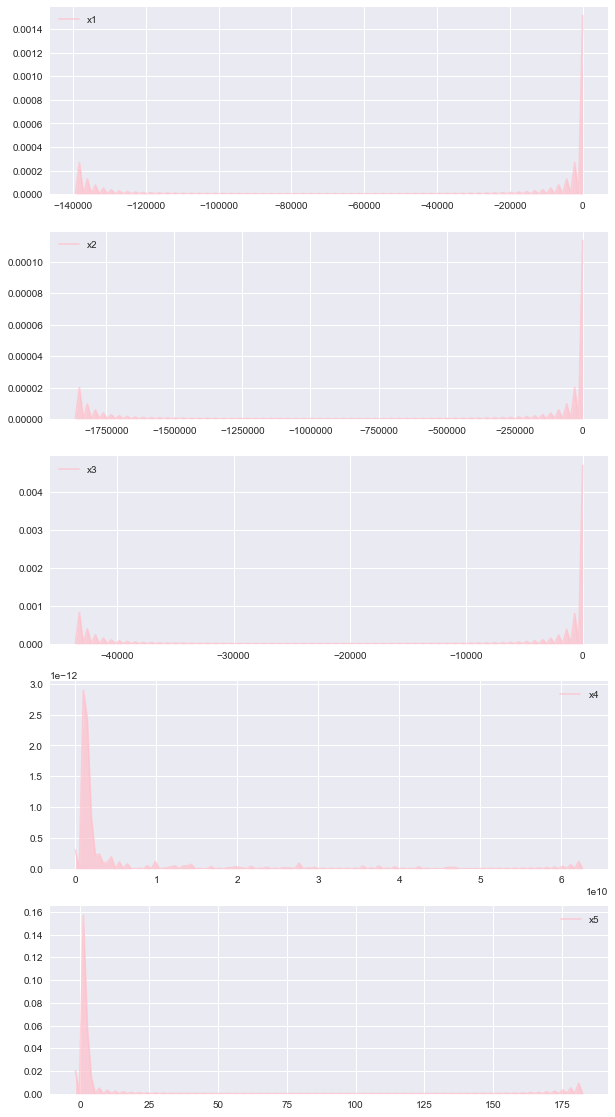

In [69]:
# Distribution of ratios
plt.subplots(squeeze=False,figsize=(10, 20))
plt.subplot(5, 1, 1)
sns.kdeplot(cm1['x1'], shade=True, color="pink", label="x1", alpha=.7)
plt.subplot(5, 1, 2)
sns.kdeplot(cm1['x2'], shade=True, color="pink", label="x2", alpha=.7)
plt.subplot(5, 1, 3)
sns.kdeplot(cm1['x3'], shade=True, color="pink", label="x3", alpha=.7)
plt.subplot(5, 1, 4)
sns.kdeplot(cm1['x4'], shade=True, color="pink", label="x4", alpha=.7)
plt.subplot(5, 1, 5)
sns.kdeplot(cm1['x5'], shade=True, color="pink", label="x5", alpha=.7)

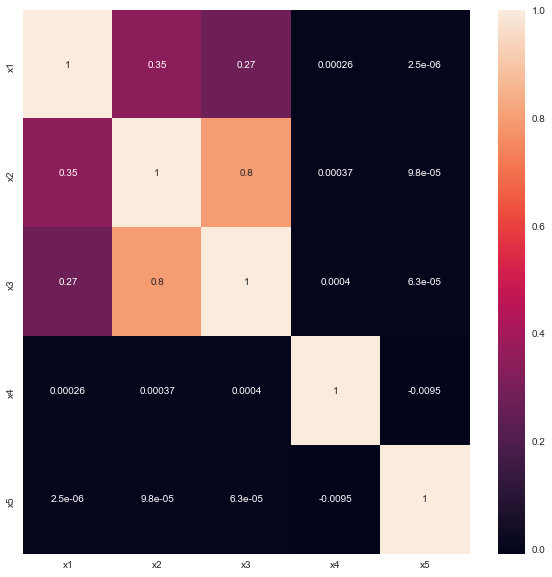

In [71]:
x = cm1[['x1','x2','x3','x4','x5']]
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True)

Correlation between x2(RE/AT) and x3(EBIT/AT) is rather high.

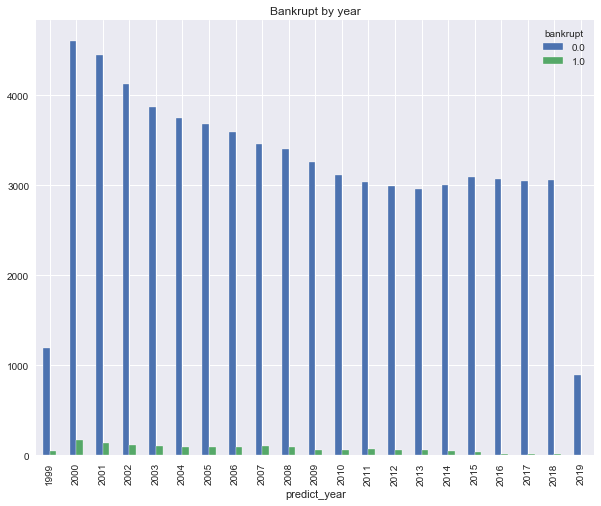

In [72]:
cm1.groupby(['predict_year','bankrupt']).size().unstack().plot(kind='bar',title='Bankrupt by year',figsize=(10,8))

In [73]:
# Bankrupt ratios
ratio = dict()
for i in np.unique(cm1['predict_year']):
    ratio[i] = len(cm1[(cm1['predict_year']==i)&(cm1['bankrupt']==1)])/(len(cm1[(cm1['predict_year']==i)&(cm1['bankrupt']==0)])+len(cm1[(cm1['predict_year']==i)&(cm1['bankrupt']==1)]))
ratio

{1999: 0.03932584269662921,
 2000: 0.035826524198617225,
 2001: 0.031147898061424525,
 2002: 0.025974025974025976,
 2003: 0.024962178517397883,
 2004: 0.023716445139431847,
 2005: 0.02357615894039735,
 2006: 0.02655107017068545,
 2007: 0.02997198879551821,
 2008: 0.0273972602739726,
 2009: 0.01926550270921132,
 2010: 0.02014479068303431,
 2011: 0.021543408360128618,
 2012: 0.019646365422396856,
 2013: 0.01857379767827529,
 2014: 0.016677567037279267,
 2015: 0.011178537208559566,
 2016: 0.006459948320413436,
 2017: 0.00489556135770235,
 2018: 0.0045528455284552845,
 2019: 0.0}

<BarContainer object of 21 artists>

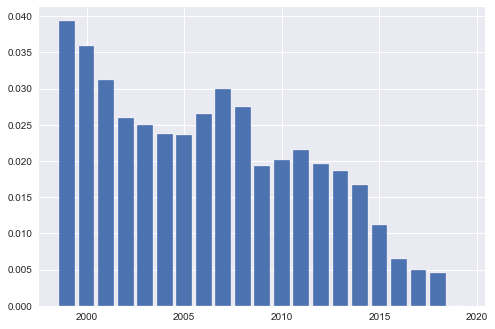

In [74]:
plt.bar(ratio.keys(),ratio.values())

The bankrupt ratio is higher in 1999, 2000, 2001, 2007 and 2008, and decreases in recent years.